# Importation des modules

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
from catboost import CatBoostClassifier
from sklearn.model_selection import  cross_val_score

# Explorations des données

In [21]:
# Lire les données à partir du fichier CSV
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [22]:
# Afficher les premières lignes du DataFrame
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [23]:
# Afficher des informations sur les types de données et les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [24]:
# Afficher des statistiques descriptives du DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [25]:
# Vérifier la forme du DataFrame (nombre de lignes, nombre de colonnes)
df.shape

(100000, 9)

In [26]:
# Vérifier les valeurs manquantes dans le DataFrame
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [27]:
# Vérifier le nombre de valeurs uniques pour les colonnes de type entier
df.select_dtypes(include='int64').nunique()


hypertension            2
heart_disease           2
blood_glucose_level    18
diabetes                2
dtype: int64

In [28]:
# Vérifier les valeurs en double dans le DataFrame
df.duplicated().sum()

3854

In [29]:
# Supprimer les valeurs en double du DataFrame
df = df.drop_duplicates()

In [30]:
# Vérifier la nouvelle forme du DataFrame après la suppression des doublons
df.shape



(96146, 9)

# VISUALISATION DES DONNEES

In [31]:
# Obtenir la liste des noms de colonnes du DataFrame
column_names = df.columns.tolist()
print("Noms des colonnes:")
print(column_names)

Noms des colonnes:
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [32]:
# Sélection des colonnes d'intérêt
selected_columns = ['hypertension', 'heart_disease', 'diabetes']

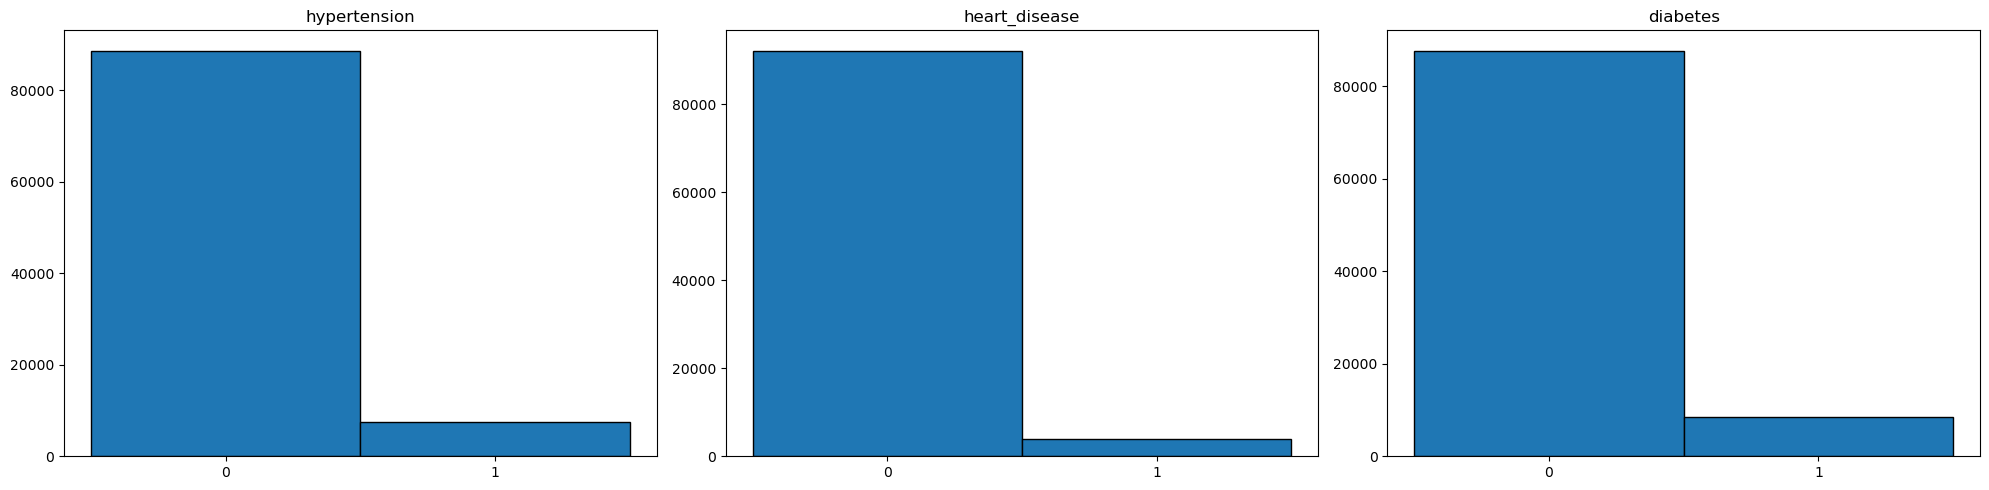

In [33]:
# Création de la figure avec 4 sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
# Spécification des intervalles pour l'histogramme (0 et 1)
bins = [-0.5, 0.5, 1.5]
# Boucle pour créer les histogrammes pour chaque variable
for i, col in enumerate(selected_columns):
    axes[i].hist(df[col], bins=bins, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xticks([0, 1])
# Ajustements de la mise en page
plt.tight_layout()
plt.show()

In [34]:
selected_columns = ['blood_glucose_level']

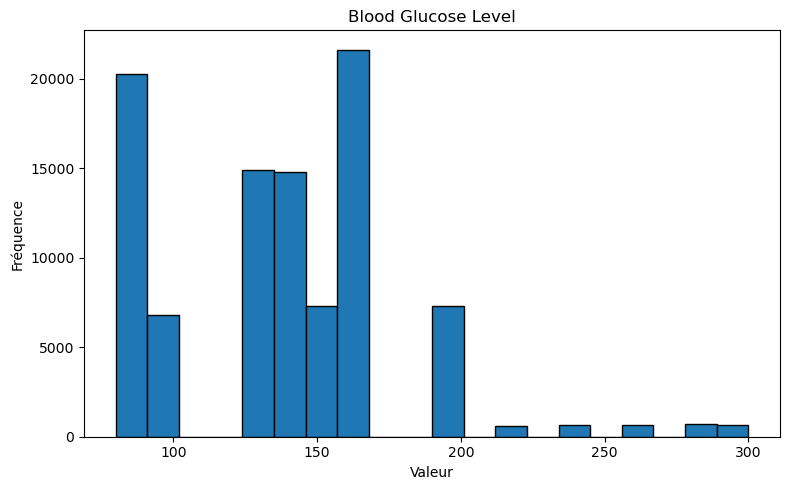

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
# Spécification des intervalles pour l'histogramme (0 et 1)
bins = 20  # Vous pouvez ajuster le nombre de bacs selon vos besoins
# Histogramme pour blood_glucose_level
ax.hist(df['blood_glucose_level'], bins=bins, edgecolor='black')
ax.set_title('Blood Glucose Level')
ax.set_xlabel('Valeur')
ax.set_ylabel('Fréquence')
# Ajustements de la mise en page
plt.tight_layout()
plt.show()

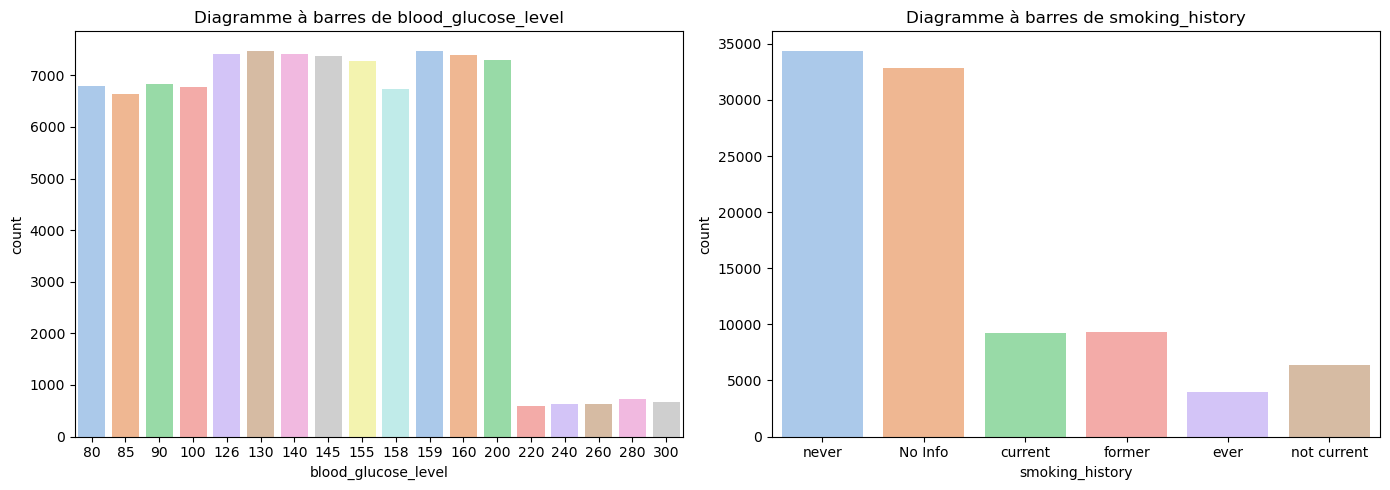

In [36]:
# Tracé de diagrammes à barres côte à côte pour les variables catégoriques
categorical_columns = ['blood_glucose_level', 'smoking_history']
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(14, 5))
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Diagramme à barres de {col}')
plt.tight_layout()
plt.show()


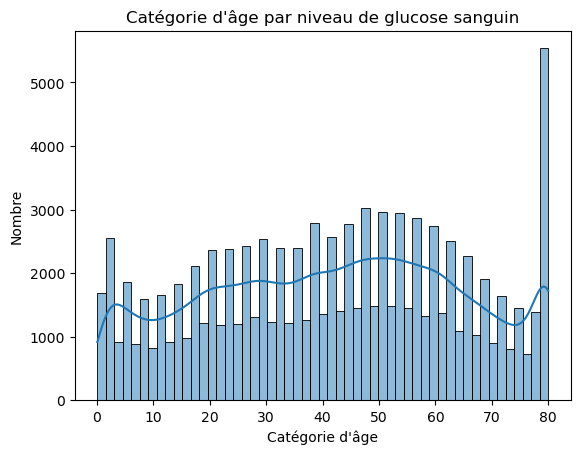

In [37]:
# Tracé d'un graphique à aires empilées pour l'âge par rapport au niveau de glucose sanguin
crosstab = sns.histplot(df["age"], kde=True)
plt.title('Catégorie d\'âge par niveau de glucose sanguin')
plt.xlabel('Catégorie d\'âge')
plt.ylabel('Nombre')
plt.show()

In [38]:
# Créer une copie du DataFrame pour éviter de modifier l'original
df_encoded = df.copy()

# Créer un objet label encoder
label_encoder = LabelEncoder()

# Itérer à travers chaque colonne objet et encoder ses valeurs
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# DataFrame encodé avec les colonnes catégoriques label encodées
df_encoded.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


<Axes: >

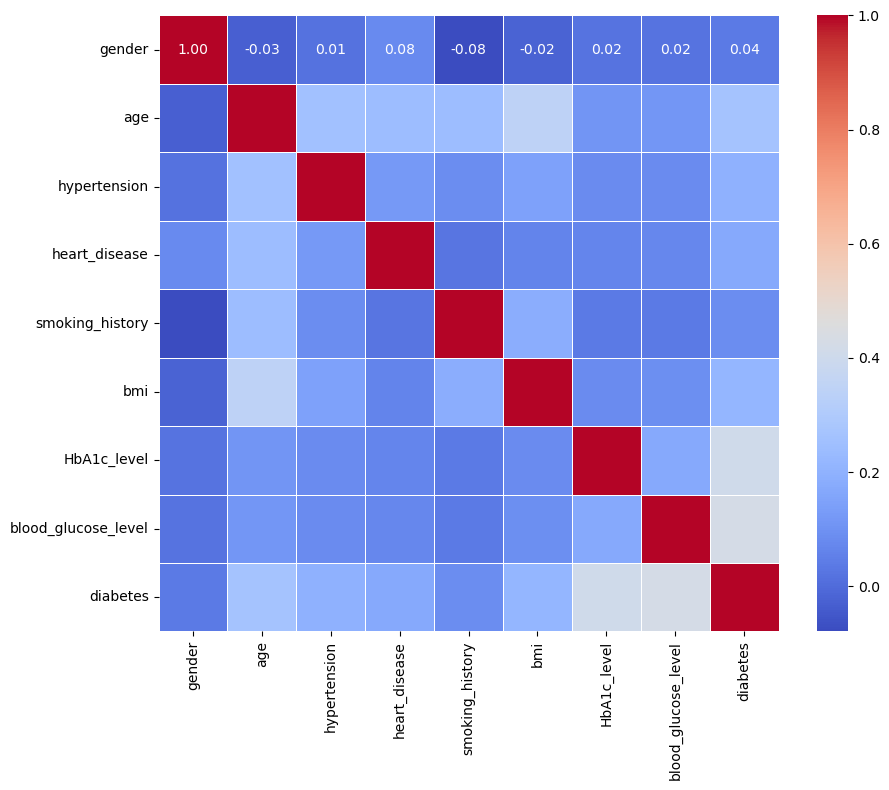

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


# Pretraitement

In [40]:
# **Vérification du déséquilibre de classe et échantillonnage**

# Vérifier la distribution de la variable cible 'diabetes'
df_encoded['diabetes'].value_counts()

# Appliquer SMOTE (Surveillance des Minorités Synthétiques)
# Diviser les données en ensembles d'entraînement et de test
X = df_encoded.drop(columns=['diabetes'])  # Caractéristiques
y = df_encoded['diabetes']  # Variable cible

In [41]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Étape 2 : Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [42]:
# Imprimer les formes des nouveaux ensembles
print("Forme de X_train :", X_train.shape)
print("Forme de X_test :", X_test.shape)
print("Forme de y_train :", y_train.shape)
print("Forme de y_test :", y_test.shape)


Forme de X_train : (140262, 8)
Forme de X_test : (35066, 8)
Forme de y_train : (140262,)
Forme de y_test : (35066,)


In [43]:
# **Suppression des valeurs aberrantes**

# Définir les colonnes pour supprimer les valeurs aberrantes
selected_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level',
                    'blood_glucose_level']

# Calculer l'IQR pour les colonnes sélectionnées dans les données d'entraînement
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

In [44]:
# Définir une valeur seuil pour la détection des valeurs aberrantes (par exemple, 1,5 fois l'IQR)
threshold = 1.5


In [45]:
# Créer un masque pour les valeurs aberrantes dans les colonnes sélectionnées
outlier_mask = (
    (X_train[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)

In [46]:
# Supprimer les lignes avec des valeurs aberrantes de X_train et y_train
X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]


In [47]:
# Imprimer le nombre de lignes supprimées
num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Nombre de lignes supprimées en raison des valeurs aberrantes : {num_rows_removed}")


Nombre de lignes supprimées en raison des valeurs aberrantes : 43191


# MODELISATION 

## Catboost

In [28]:
# **Catboost Classifier**

# Créer le classifieur CatBoost
catboost_classifier = CatBoostClassifier(random_seed=42, logging_level='Silent', learning_rate=0.1, depth=10,
                                         subsample=0.8)

catboost_classifier.fit(X_train_clean, y_train_clean)

# Prédictions sur l'ensemble de test
y_pred = catboost_classifier.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Précision du modèle CatBoost :", accuracy)
print("Rapport de classification :\n", report)


Précision du modèle CatBoost : 0.9798665373866423
Rapport de classification :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17439
           1       0.99      0.97      0.98     17627

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066



[[17299   140]
 [  566 17061]]


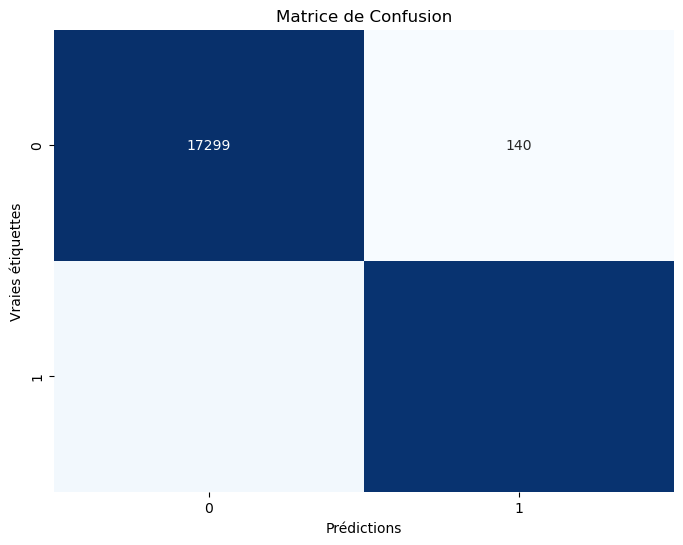

In [29]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=catboost_classifier.classes_, yticklabels=catboost_classifier.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## Logistic Regression

In [48]:
# Logistic Regression
  
logistic_model = LogisticRegression()
logistic_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))


Logistic Regression Accuracy: 0.89
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     17439
           1       0.88      0.90      0.89     17627

    accuracy                           0.89     35066
   macro avg       0.89      0.89      0.89     35066
weighted avg       0.89      0.89      0.89     35066



[[15374  2065]
 [ 1839 15788]]


<function matplotlib.pyplot.show(close=None, block=None)>

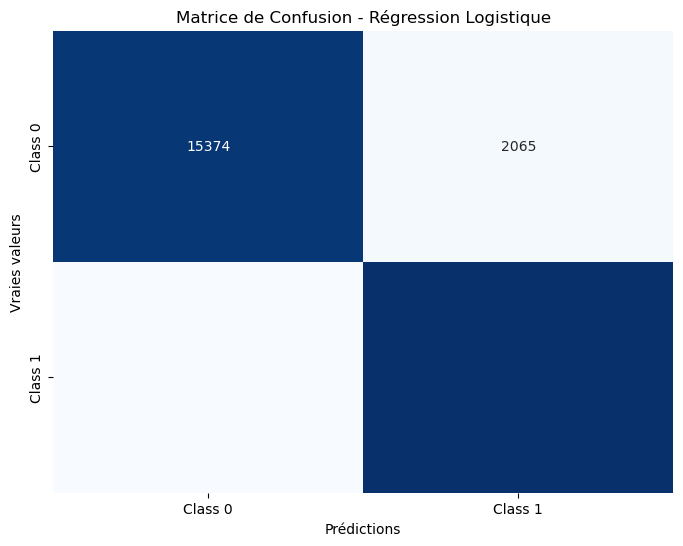

In [57]:

# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Class 0', 'Class 1']

# Affichage de la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Régression Logistique')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show

## Random forest

In [58]:
# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train_clean, y_train_clean)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)


Model Accuracy: 0.9239149033251582
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     17439
           1       0.91      0.94      0.93     17627

    accuracy                           0.92     35066
   macro avg       0.92      0.92      0.92     35066
weighted avg       0.92      0.92      0.92     35066



[[15887  1552]
 [ 1116 16511]]


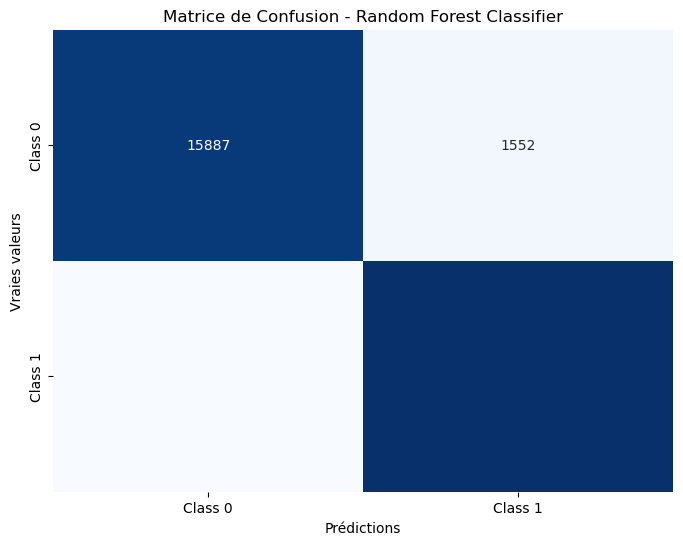

In [59]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Class 0', 'Class 1']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Random Forest Classifier')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

## LEARNING CURVE

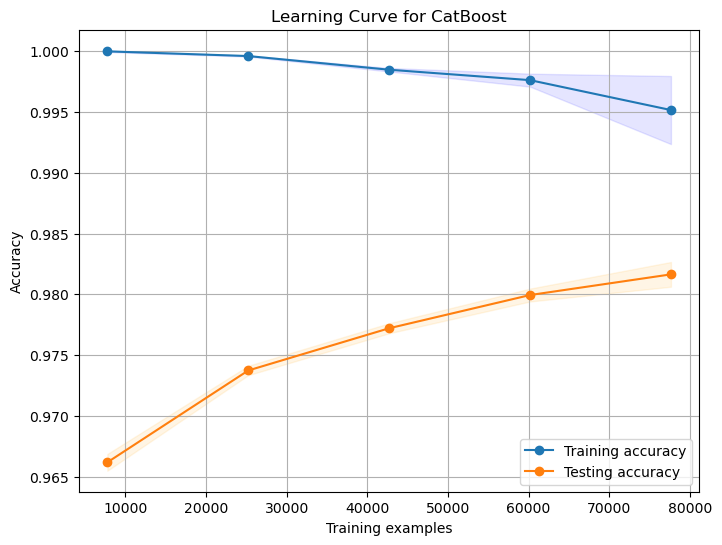

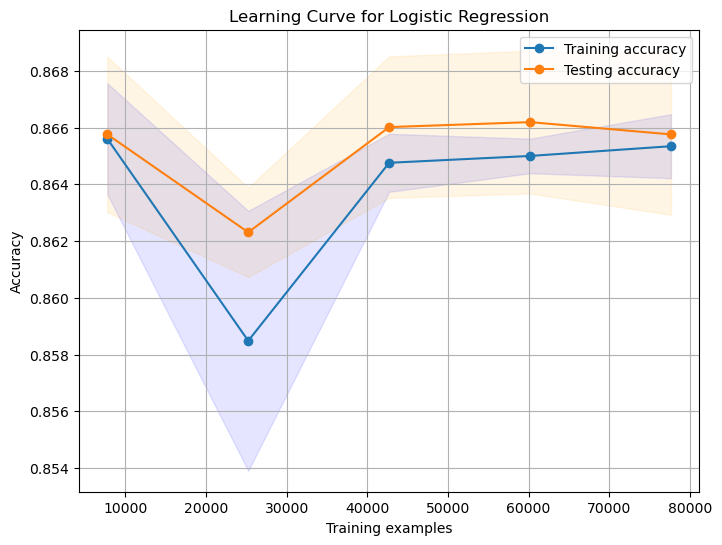

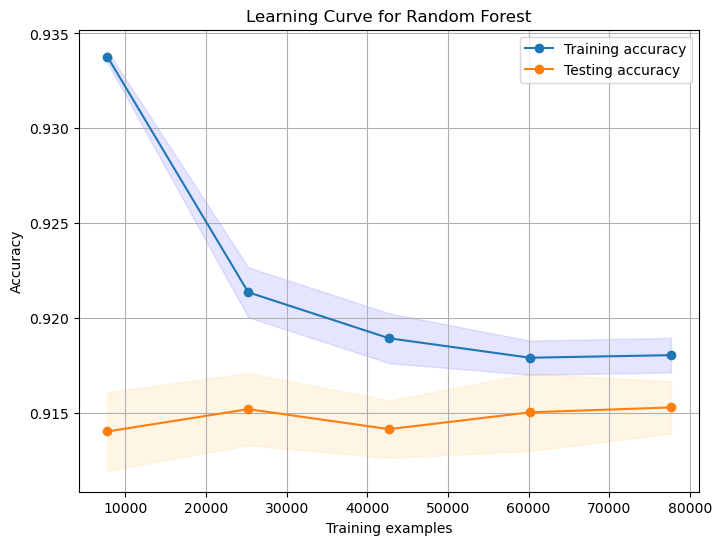

In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
# Create a list of models
models = [
    ('CatBoost', catboost_classifier),
    ('Logistic Regression', logistic_model),
    ('Random Forest', rf_classifier)
]

# Generate learning curves for each model
for model_name, model in models:
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_clean, y_train_clean, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5)  # Adjust train_sizes as needed
    )

    # Calculate mean and standard deviation of scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.title(f"Learning Curve for {model_name}")
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training accuracy')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Testing accuracy')

    # Plot shaded area for standard deviation
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='orange')

    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()


# VALIDATION CROISEE

In [33]:
# **Vérification croisée **

# Créer le classifieur CatBoost
catboost_classifier = CatBoostClassifier(random_seed=42, logging_level='Silent', learning_rate=0.1, depth=10,
                                         subsample=0.8)

# Effectuer une validation croisée k-fold
cv_scores = cross_val_score(catboost_classifier, X_train_clean, y_train_clean, cv=5, scoring='accuracy')

# Imprimer les scores de validation croisée
print("Scores de validation croisée :", cv_scores)
print("Précision moyenne :", cv_scores.mean())


Scores de validation croisée : [0.97970641 0.98063253 0.98192026 0.98243536 0.98238385]
Précision moyenne : 0.9814156824311058


# TESTE SUR UN ECHANTILLON 

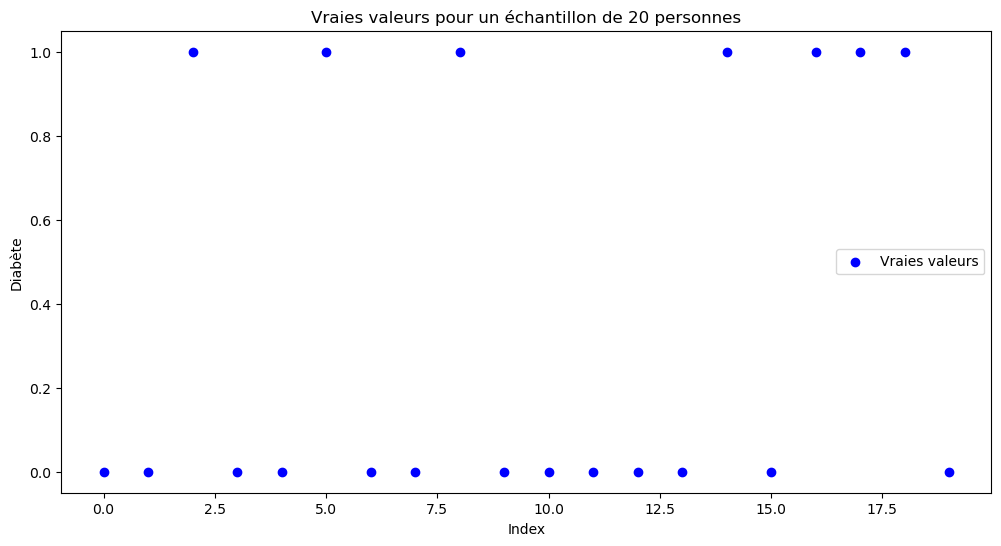

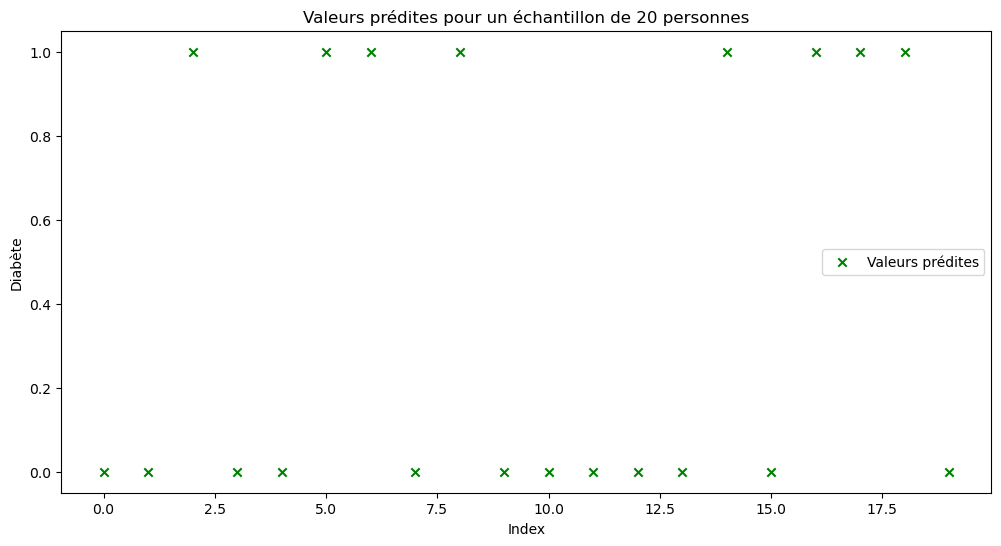

In [34]:
# Sélectionner un échantillon aléatoire de 10 lignes
random_sample = df_encoded.sample(n=10, random_state=42)
# Séparer les caractéristiques (X) et la variable cible (y)
X_sample = random_sample.drop("diabetes", axis=1)
y_sample = random_sample["diabetes"]
# Créer le classifieur CatBoost
catboost_classifier = CatBoostClassifier(random_seed=42, logging_level='Silent', learning_rate=0.1, depth=10,
                                         subsample=0.8)
# Adapter le modèle à l'ensemble de données d'entraînement
catboost_classifier.fit(X_train_clean, y_train_clean)
# Prédictions sur l'ensemble de test
y_pred_all = catboost_classifier.predict(X_test)
# Ajouter les colonnes des prédictions au DataFrame de l'ensemble de test
df_test_predictions = X_test.copy()
df_test_predictions['Real'] = y_test
df_test_predictions['Predictions_CatBoost'] = y_pred_all
# Sélectionner un échantillon aléatoire de 300 lignes dans l'ensemble de test
random_subset = df_test_predictions.sample(n=20, random_state=42)
# Plot pour les vraies valeurs
plt.figure(figsize=(12, 6))
plt.scatter(range(len(random_subset)), random_subset['Real'], label='Vraies valeurs', marker='o', color='blue')
plt.title('Vraies valeurs pour un échantillon de 20 personnes')
plt.xlabel('Index')
plt.ylabel('Diabète')
plt.legend()
plt.show()
# Plot pour les valeurs prédites
plt.figure(figsize=(12, 6))
plt.scatter(range(len(random_subset)), random_subset['Predictions_CatBoost'], label='Valeurs prédites', marker='x', color='green')
plt.title('Valeurs prédites pour un échantillon de 20 personnes')
plt.xlabel('Index')
plt.ylabel('Diabète')
plt.legend()
plt.show()